# Hotel Review Sentiment Analysis


I am the kind of person who always reads reviews. Be it going to a new restaurant or buying a treadmill, I'm going to base my decision off of the impressions of other buyers, plus I'd definitely consider what they mentioned as the downside of a product or a place. Not surprisingly, when going on vacation, I read hotel reviews. This is actually one of the main sorting criteria for me together with price and location. So when thinking of hotel reviews, I wondered what I can find out en masse and study the sentiments of reviewers.

**Dataset**

The dataset used for this project was downloaded from Kaggle.com. Originally, the information was scraped from Booking.com.

The data was presented in a csv file featuring 515,000 guest reviews that evaluated 1,493 hotels in Europe. There are 17 columns in the file as follows:

1. Hotel_Address: Address of hotel.
2. Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
3. Review_Date: Date when reviewer posted the corresponding review.
4. Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
5. Hotel_Name: Name of Hotel
6. Reviewer_Nationality: Nationality of Reviewer
7. Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
8. Review_Total_Negative_Word_Counts: Total number of words in the negative review.
9. Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
10. Review_Total_Positive_Word_Counts: Total number of words in the positive review.
11. Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
12. Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewer has given in the past.
13. Total_Number_of_Reviews: Total number of valid reviews the hotel has.
14. Tags: Tags reviewer gave the hotel.
15. days_since_review: Duration between the review date and scrape date.
16. lat: Latitude of the hotel
17. lng: longtitude of the hotel

The only preprocessing that was done on the data set prior to us obtaining it was removing unicode, punctuation, and transforming all text into lower case. 

**Research Process**

For the purposes of this research we are going to follow the OSEMN process, which stands for Obtain, Scrub, Explore, Model, and iNterpret.

We have already covered how we obtained the data from Kaggle.com. Next, we need dto load the data and check whether the data types are consistent, or if the dataset has any null values. After that comes a very important part of any data science research. We are going to explore our data set through visualizations searching for patterns and trends. There is a lot we can find out just from this step alone before we move to the next thing to do, which is modeling. For this project, we are going to turn to a classification model. After all is said and done, we are going to provide suggestions for how to use the findings in real world.

**Goal Of This Research**

The aim of our study would be to find out general patterns and trends when it comes to reviewing the hotel. We will focus on trying to predict what words can signal whether the hotel will get a high or a low score. We will also focus on the reviewers: what nationality is the most generous when it comes to reviewing accommodations? Lastly, we'll investigate whether hotels' location is connected to general patterns and trends of the kind of score it will receive.

## Obtain The Data

In [1]:
#load the necessary packages
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk import sent_tokenize, word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from gensim.models import word2vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/algonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load the data set and view the first 5 rows
df = pd.read_csv("Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


At first glance, we can see that the address of the hotel address features several parameters in the same line, and if we want to do more digging into the correlation between hotel scores and location, we'll need to do feature engineering to disect the city / country where the hotel is in from the rest of the address information. 

Let's study the dataset futher.

In [3]:
#view the number of rows and columns
df.shape

(515738, 17)

Like we noted previously, there are 17 columns and 515,738 reviews in the dataset.

## Scrub The Data

Now that we have our dataset, we need to check whether there is any missing data or null values, so we can deal with them before moving to visualization and modeling. 

In [4]:
#view data types and data input in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

As we can see the only null values are in the *lat* and *lng* columns which are aren't going to need for furhter ananlysis, so we are going to drop these 2 columns.

In [5]:
#drop lat and lng columns
df = df.drop(['lat','lng'],axis=1, inplace=False)
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


In [6]:
#view last 5 lines
df.tail()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8.3,"[' Leisure trip ', ' Family with young childre...",725 day


We are going to find out where the 1,493 hotels in our dataset are located.

Because one of the countries is 'United Kingdom', we will first replace it by the 'UK' for ease of future analysis.

In [7]:
#replace 'United Kingdom' with 'UK'
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')

In [8]:
#create a new feature - country
df['Country'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
df['Country'].value_counts()

UK             262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: Country, dtype: int64

## Explore The Data

We can learn a lot from the data simply by visualizing the variables before we move to the modeling stage. 

Let's visualize the distribution of hotels per country.

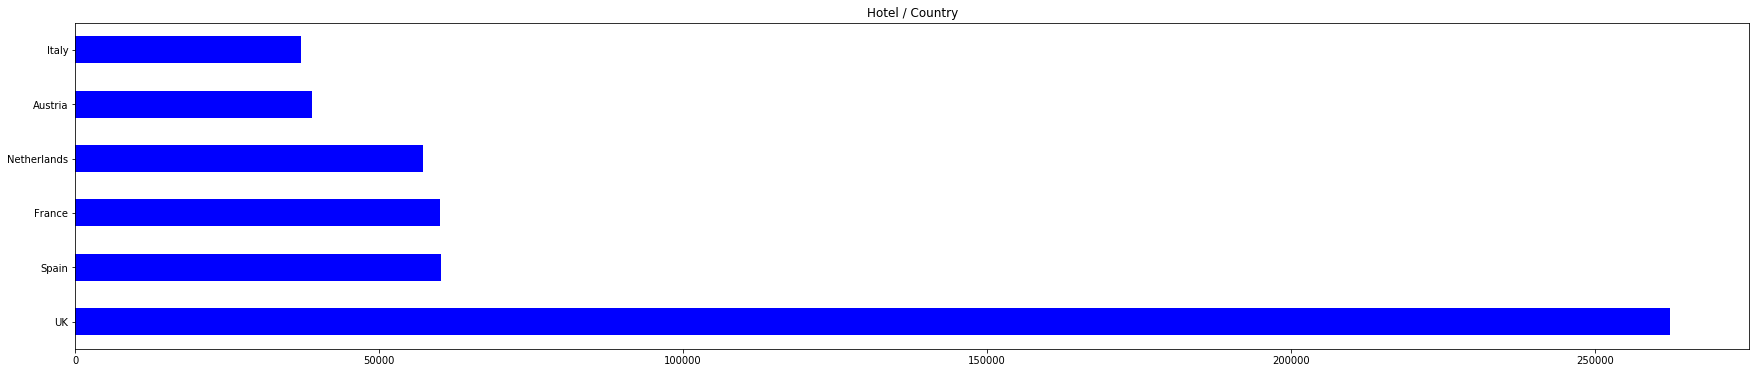

In [9]:
#visualize the distribution of hotels per country in the dataset
plt.figure(figsize = (30,6))
plt.title('Hotel / Country')
df.Country.value_counts().plot.barh(color = 'blue')

As seen in the plot, all the hotels in the data set are located in 6 European countries, and most of the hotels are located in the UK.

We can dig deeper and also look at the cities where the hotels are located.

In [10]:
#create a new feature - city
df['City'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-2])
df['City'].value_counts()

Barcelona    60149
Paris        59928
Amsterdam    57214
Vienna       38939
Milan        37207
9SJ           4789
0JJ           4256
7UT           4169
5SY           3578
3AN           3285
4AF           3212
3JP           2958
5SP           2768
1JU           2628
4LH           2565
0TW           2551
9PD           2369
3DP           2288
0BU           2227
7RY           2223
6AF           2203
7TJ           2167
1JS           2155
5HW           2147
0QQ           2059
4DD           2043
3LB           1971
3LG           1938
8DS           1848
4UL           1845
             ...  
2EU            101
7RL            100
2NG             99
4JE             95
3EG             87
5DL             86
9NX             86
7LA             85
7JD             84
7JB             82
7AA             78
7LY             77
9PY             76
2BX             76
9HB             74
1NY             74
1AS             63
2JR             62
5JT             49
4BP             49
2AL             45
0AE         

Hmmm, turns out the UK addresses have the zipcode following the name of the city. Let's see what we can do with that.

In [11]:
df['City'].loc[df['Country'] == 'UK'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-4])
df['City'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: City, dtype: int64

Nothing unusual here, each country is represented by the most touristy city.

Next, we are going to find out the top 10 most and least popular hotels from the dataset.

In [12]:
#top 10 lowest scoring hotels
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews','City']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,City
54717,Ritz Paris,9.8,122,Paris
185602,41,9.6,244,London
14708,Haymarket Hotel,9.6,255,London
176997,H tel de La Tamise Esprit de France,9.6,166,Paris
402244,H10 Casa Mimosa 4 Sup,9.6,454,Barcelona
398945,Hotel The Serras,9.6,604,Barcelona
316447,Hotel Casa Camper,9.6,732,Barcelona
390999,Ham Yard Hotel,9.5,314,London
299896,Palais Coburg Residenz,9.5,98,Vienna
81043,Hotel The Peninsula Paris,9.5,275,Paris


In [13]:
#top 10 lowest scoring hotels
df[df.Average_Score <= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews','City']].drop_duplicates().sort_values(by ='Average_Score',ascending = True)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,City
494791,Hotel Liberty,5.2,465,Milan
323302,Savoy Hotel Amsterdam,6.4,995,Amsterdam
242324,Hotel Cavendish,6.4,2275,London
129781,The Tophams Hotel,6.6,411,London
157843,Best Western Maitrise Hotel Edgware Road,6.6,461,London
485009,Ibis Styles Milano Palmanova,6.7,207,Milan
204614,Commodore Hotel,6.7,2400,London
68936,Villa Eugenie,6.8,165,Paris
130789,Bloomsbury Palace Hotel,6.8,2751,London
475738,Idea Hotel Milano San Siro,6.9,5742,Milan


In [14]:
#top 10 most reviewed hotels
df[['Hotel_Name','Average_Score','Total_Number_of_Reviews','City']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending =False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,City
488409,Hotel Da Vinci,8.1,16670,Milan
504027,Park Plaza Westminster Bridge London,8.7,12158,London
496065,Hotel degli Arcimboldi,8.3,10842,Milan
164259,Strand Palace Hotel,8.1,9568,London
63942,Britannia International Hotel Canary Wharf,7.1,9086,London
311000,Best Western Premier Hotel Couture,8.7,8177,Amsterdam
509232,The Student Hotel Amsterdam City,8.7,7656,Amsterdam
379680,Golden Tulip Amsterdam West,8.5,7586,Amsterdam
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491,London
404728,Glam Milano,8.8,7371,Milan


In [15]:
#top 10 least reviewed hotels
df[['Hotel_Name','Average_Score','Total_Number_of_Reviews','City']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending =True)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews,City
250467,Hotel Daniel Paris,8.8,43,Paris
85168,Boundary Rooms Suites,8.4,45,London
122487,XO Hotel,8.9,49,Paris
48780,The Henrietta Hotel,9.2,49,London
250308,MARQUIS Faubourg St Honor Relais Ch teaux,8.6,51,Paris
180537,Renaissance Paris Republique Hotel Spa,8.5,54,Paris
191756,The Curtain,9.1,59,London
71594,Villa d Estr es,8.7,59,Paris
78350,Splendide Royal Paris,9.4,59,Paris
89963,Hotel Dupond Smith,9.3,60,Paris


Now that we know a little more about the hotels, let's take a closer look at who our reviewers are.

In [16]:
#see reviewer nationality distribution
df['Reviewer_Nationality'].value_counts()

 United Kingdom                    245246
 United States of America           35437
 Australia                          21686
 Ireland                            14827
 United Arab Emirates               10235
 Saudi Arabia                        8951
 Netherlands                         8772
 Switzerland                         8678
 Germany                             7941
 Canada                              7894
 France                              7296
 Israel                              6610
 Italy                               6114
 Belgium                             6031
 Turkey                              5444
 Kuwait                              4920
 Spain                               4737
 Romania                             4552
 Russia                              3900
 South Africa                        3821
 India                               3437
 Greece                              3406
 China                               3400
 Sweden                           

With 227 nationalities represented, reviewers pretty much cover the whole world. The most active travellers and reviewers are guests from the UK, followed by the US, Australia, Ireland, and United Arab Emirates.

Now, we are going to see how active the customers were, and how many reivews they have submitted.

In [17]:
#find out how many reviews people usually submit
df.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()

1      154640
2       67077
3       46845
4       35026
5       27629
6       22621
7       18614
8       16150
9       13545
10      11717
11       9992
12       9002
13       7765
14       6762
15       5929
16       5385
17       4865
18       4394
19       3806
20       3428
21       3211
22       2879
23       2678
24       2345
25       2120
26       2016
27       1631
28       1562
29       1437
31       1378
        ...  
281         2
223         2
224         2
228         2
162         2
270         2
184         1
355         1
201         1
330         1
232         1
237         1
186         1
133         1
182         1
181         1
179         1
155         1
135         1
174         1
172         1
137         1
170         1
169         1
141         1
165         1
164         1
161         1
160         1
239         1
Name: Total_Number_of_Reviews_Reviewer_Has_Given, Length: 198, dtype: int64

Turns out, there aren't many frequent reviewers. To gain more knowledge, let's look at the data distribution.

In [18]:
df.Total_Number_of_Reviews_Reviewer_Has_Given.describe()

count    515738.000000
mean          7.166001
std          11.040228
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         355.000000
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: float64

Only the top 25% of customers leave 8 reviews or more. It would be interesting to find out who the top reviewers are. Here we'll consider only the contries that provided 100 or more reviews.

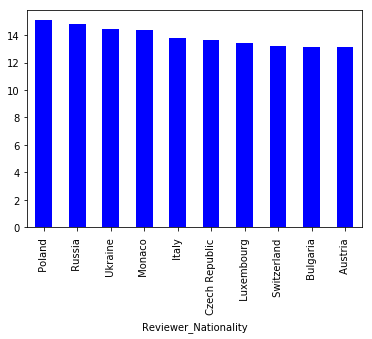

In [19]:
#visualize number of reviews by nationality for those with 100 or more reviews
orig = df['Reviewer_Nationality'].value_counts()[df['Reviewer_Nationality'].value_counts() > 100]
plt2 = df.groupby('Reviewer_Nationality').mean()
plt2.loc[orig.index.tolist()]['Total_Number_of_Reviews_Reviewer_Has_Given'].sort_values(ascending=False)[:10].plot(kind="bar",color='blue')

Now, let's see which nationality leaves the highest reviews.

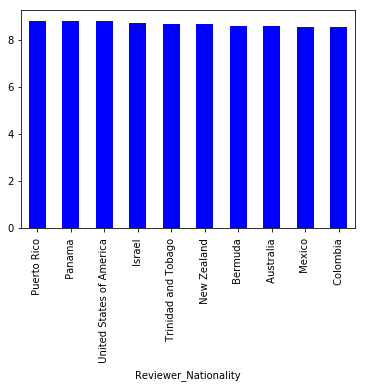

In [20]:
orig1 = df['Reviewer_Nationality'].value_counts()[df['Reviewer_Nationality'].value_counts() > 100]
plt3 = df.groupby('Reviewer_Nationality').mean()
plt3.loc[orig1.index.tolist()]['Reviewer_Score'].sort_values(ascending=False)[:10].plot(kind="bar",color='blue')

On Booking.com, the minimum review score is 2.5, and the maximum is 10. Let's visualize the average review score distribution for our hotels in question.

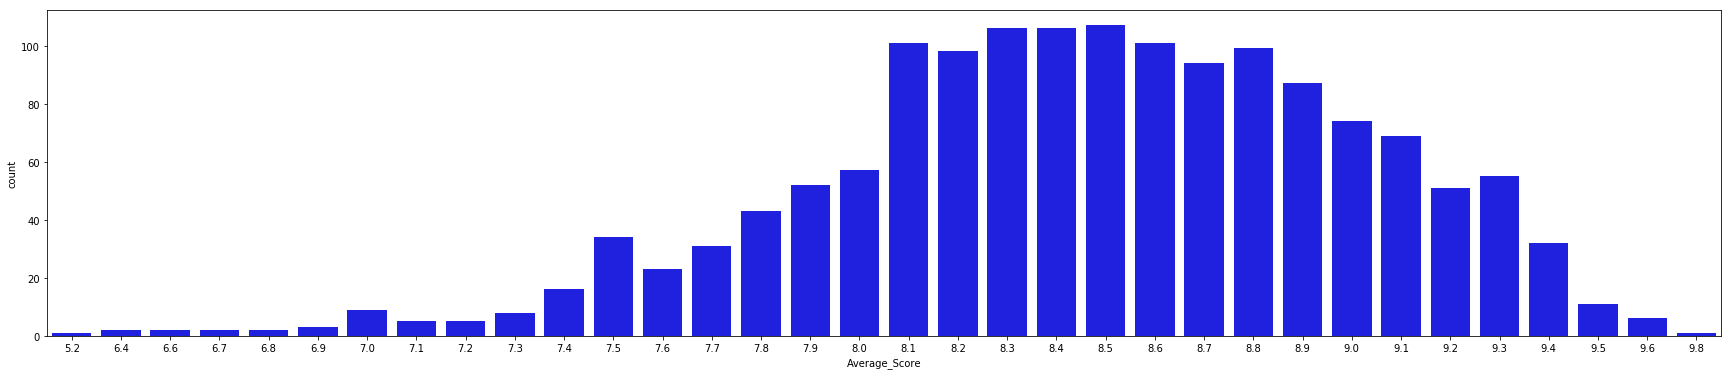

In [21]:
plt2 = df[['Hotel_Name','Average_Score']].drop_duplicates()
plt.figure(figsize = (30,6))
sns.countplot(x = 'Average_Score',data = plt2,color='blue')

Looks like the majority of hotels has a rating from 8.1 to 9.1. Let's check the distribution within the *Average Score* column.

In [22]:
df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

Because the scores only start at 2.5, we can say that the overall ratings are somewhat inflated with the minimum score in our dataset starting at 5.2. We can see that 50% of hotels score below 8.4 which we are going to consider as a threshold for generally being a 'good' hotel.

Going to word stats, out of curiosity, let's see whether people write longer negative or positive reviews.

In [23]:
#positive review word count
df.Review_Total_Positive_Word_Counts.sum()/len(df)

17.77645820164502

In [24]:
#negative review word count
df.Review_Total_Negative_Word_Counts.sum()/len(df)

18.539450263505888

Although, there is not that much of a difference, but on average we can say that negative reviews are slightly longer than positive ones.

In [25]:
#combine positive and negative reviews into one df
df['Review'] = df['Negative_Review'] + df['Positive_Review']
# create the label
df['Is_bad_review'] = df['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
df = df[['Review', 'Is_bad_review']]
df.head()

,Review,Is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


To avoid skewing our resuls by repetitive phrasing 'No negative' and 'No positive' in cases where the reviewer provided only 1 type of comment, we are goin to remove the 'null' inputs.

In [26]:
#remove 'no negative' or 'no positive'
df['Review'] = df['Review'].apply(lambda x: x.replace('No Negative', '').replace('No Positive', ''))

## Modeling

At this point we are ready to model our data. The goal of our model is to see whether we can predict if a review is positive or negative based on the kind of words that are used in the review. To fulfil this goal, we are goin to create a classification model with word embeddings.

Because such models are comuputationally complex, we are going to use a subset of data for futher calculations.

In [27]:
#create a subset of data 
df_sample = df.sample(frac = 0.1, replace = False, random_state=42)

Since the target of this model is to predict whether a review is positive or negative, we are going to save the labels into a 'target'variable, and tokenize the text.

In [28]:
#save review labels as target and tokenize text 
target = df_sample['Is_bad_review']
data = df_sample['Review'].map(word_tokenize).values

Further on, we are going to use Global Vectors for Word Representation from the Stanford NLP Group. The set features some of the best pre-trained word vectors available. 

We are only going to need the vectors for the words in the dataset, so we need to put together the total vocabulary of the dataset. Since we already tokenized the reviews, we are now going to add the words to the Python set object.

In [29]:
#calculate total vocabulary
total_vocabulary = set(word for review in data for word in review)

In [30]:
#check the number of words in the total vocabulary
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 31534 unique tokens in the dataset.


Now that we know the total number of words in our subset is 31,534, we are going to get the vectors we need out of the GloVe file.

In [31]:
#create dictionary containing vectors for the corresponding vocabulary
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

We are going to create a mean embedding vectorizer class to make the next modeing step possible.

In [32]:
#create mean embedding vectorizer class
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

To keep the code clean, we will make use of the scikit-learn pipelines. We'll pass the mean embedding vectorizer created above to create pipeline objects.

In [33]:
#use scikit-learn pipelines
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])

For each pipeline, we are going to create a tuple consisting of a pipeline object and its name.

In [34]:
#create name-pipeline object tuples
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

We are now ready to train the model. 

In [35]:
#train the model
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [36]:
#check the training scores
scores

[('Random Forest', 0.9567223794935433),
 ('Support Vector Machine', 0.9567611587233877),
 ('Logistic Regression', 0.955209989529608)]

We got pretty high cross validation scores which says that our model is performing pretty well. Something to consider is that we only used a subset of data not to get hung up by the slow computational speeds. In case we have a larger set of total vocabulary, we might get a different result which we can research in further projects.

Now that we can predict whether a review is good or bad with pretty high certainty, let's dig deeper into what makes it a good review, and what features guests note the most when praising an accommodation.

In [37]:
#create a good review df
good = df['Is_bad_review'] == 0
df1 = df[good]
df1 = df1['Review']
df1.head()

1     No real complaints the hotel was great great ...
2     Rooms are nice but for elderly a bit difficul...
4     You When I booked with your company on line y...
5     Backyard of the hotel is total mess shouldn t...
7     Apart from the price for the brekfast Everyth...
Name: Review, dtype: object

For further analysis, we are going to preprocess the data tokenize the words.

In [38]:
#add necessary packages
import re
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/algonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/algonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
#create a list of words in a positive review
gr = []
for i in df1:
    letters = re.sub('[^a-zA-Z]',' ',i)
    tokens = nltk.word_tokenize(letters)
    lowercase = [l.lower() for l in tokens]
    filtered_presult = list(filter(lambda l: l not in stop_words, lowercase))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_presult] 
    gr.append(' '.join(lemmas))

From the list of words in positive reviews, let's select the top 50 to understand what features are most important for guests when choosing an accommodation. 

In [42]:
#review frequency
gr_freq = FreqDist(gr)
gr_freq.most_common(50)

[('location', 1578),
 ('nothing everything', 1362),
 ('everything', 975),
 ('great location', 461),
 ('', 419),
 ('breakfast', 338),
 ('nothing location', 288),
 ('good location', 266),
 ('room small', 265),
 ('friendly staff', 242),
 ('everything perfect', 242),
 ('nothing', 210),
 ('good', 190),
 ('location staff', 189),
 ('small room', 185),
 ('small room location', 177),
 ('staff friendly helpful', 176),
 ('excellent location', 173),
 ('staff', 173),
 ('friendly helpful staff', 155),
 ('room small location', 133),
 ('staff helpful', 131),
 ('bed comfortable', 130),
 ('perfect', 129),
 ('breakfast location', 123),
 ('location perfect', 107),
 ('staff location', 107),
 ('everything great', 106),
 ('nothing every thing', 102),
 ('location excellent', 101),
 ('bed comfy', 101),
 ('perfect location', 101),
 ('staff friendly', 100),
 ('price location', 99),
 ('great location friendly staff', 99),
 ('good breakfast', 99),
 ('excellent', 94),
 ('helpful staff', 92),
 ('location great', 92)

Location, breakfast and staff are the things that guests note the most and like to review, so it's important hoteliers pay special attention to those things to ensure their guests have a wonderful stay.

## Conclusions

This dataset is rich in information we can get out of it, and with this research we barely scratched the surface. We have a lot of room for further tweaking the data and diving even deeper into the sentiment analysis.

Some of the main things we've learned about a dataset were that all 515+k hotels are located in 6 cities in Europe. We found out the highest and lowest scoring hotels overall, which we can further extrapolate for highest and lowest scoring properties in a specific city. We discovered what nationalities are the most vocal when it comes to reviewing hotels, and who are the most generous reviewers. We also found out that Booking.com's guests don't review properties very often, but generally, the site has pretty high review scores, with 50% of hotels receiving the score of about 8.4. We also worked on predicting whether a review is positive or negative based on the words used in it, and looked at the most frequently used terms in positive reviews.

At the same time, there is still plenty of space for us to do further research. One thing to consider was we removed the lines containing null values for latitude and longitude, and consequently lost some data. In further research, we can look into adding that information from the hotel address that is available in the dataset.  We can definitely dig deeper into visualizations and pulling further insights from the dataset. For example, we can find out what scores to the most vocal nations usually give to the properties or whether there is any correlation between the nationality and whether a person only adds a positive or a negative review. When modeling, we can look at a bigger sample of data to check if the model will still perform so well. Also, we can dig into negative reviews and check whether customers note the same or different features when leaving a bad review.